In [6]:
import numpy as np
import pandas as pd
data = np.array([[0,2,0,0],[0,1,4,0],[0,1,1,0]])
data_raw =pd.DataFrame({'Column1': data[:,0], 'Column2': data[:,1], 'Column3': data[:,2], 'Column4':data[:,3]})
data_raw

,Column1,Column2,Column3,Column4
0,0,2,0,0
1,0,1,4,0
2,0,1,1,0


In [18]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
# normalize data attributes
norm_data = preprocessing.normalize(data)
dataset =pd.DataFrame({'Column1': norm_data[:,0], 'Column2': norm_data[:,1], 'Column3': norm_data[:,2], 'Column4':norm_data[:,3]})
dataset

,Column1,Column2,Column3,Column4
0,0.0,1.000000,0.000000,0.0
1,0.0,0.242536,0.970143,0.0
2,0.0,0.707107,0.707107,0.0


In [26]:
# Create Variance Threshold Vector
selector = VarianceThreshold()
feature_selected = selector.fit_transform(norm_data)
print(feature_selected)
dataset =pd.DataFrame({'Column2': norm_data[:,1], 'Column3': norm_data[:,2]})
dataset

[[1.         0.        ]
 [0.24253563 0.9701425 ]
 [0.70710678 0.70710678]]


,Column2,Column3
0,1.000000,0.000000
1,0.242536,0.970143
2,0.707107,0.707107


In [36]:
# Feature extraction using principal component analysis
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Load dataset into Pandas dataframe
data_frame = pd.read_csv(url, names=['sepal length','sepal width', 'petal length', 'petal width','target'])
data_frame

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
# In order to use principal compontnt analysis we need to standartized the data. PCA cannot be calculated before standartization is done (St. deviation is one and mean is zero) 
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width', 'petal length', 'petal width']
# Separating out the features
x = data_frame.loc[:, features].values
# Separating out the target
y = data_frame.loc[:, ['target']].values
# Standartizing the features
x = StandardScaler().fit_transform(x)
x_data_frame = pd.DataFrame({'sepal length': x[:,0],'sepal width': x[:,1], 'petal length': x[:,2], 'petal width': x[:,3],'target':y[:,0]}) 
x_data_frame

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [60]:
# Apply PCA by removing features by feature extraction. Reduce 4 dimensions of x_data_frame to 2
#extract to a smaller dimensions set without loosing accuracy
#DF = data frame
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_DF = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
principal_DF

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [61]:
# Add atrget column
finalDF = pd.concat([principal_DF, df[['target']]], axis = 1)
finalDF

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


<bound method _AxesBase.grid of <Axes: title={'center': 'Two Components Principal Component Analysis'}, xlabel='principal component 1', ylabel='principal component 2'>>

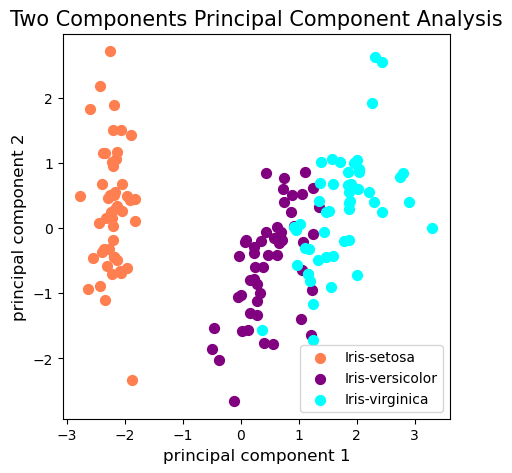

In [76]:
# Visualize data
# We ararged data in 2 dimensions on purpose to plot with matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('Two Components Principal Component Analysis', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['coral', 'purple', 'aqua']
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['target']== target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               ,finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid



In [78]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

0.9580097536148198

In [79]:
#Reduced features from 4 to 2 but retained 95% variance in the features
total_variance = variance_ratio[0] + variance_ratio[1]
total_variance

0.9580097536148198